In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing import image
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image

# Import your images
---

In [ ]:
# Content Image
!wget -O cat.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg

# Style Image
!wget -O style.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg/220px-Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg

--2021-11-18 07:55:59--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487541 (476K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 476.11K  --.-KB/s    in 0.06s   

2021-11-18 07:55:59 (7.65 MB/s) - ‘cat.jpg’ saved [487541/487541]

--2021-11-18 07:55:59--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg/220px-Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861

## Load a content and a style image
--- 

cat.jpg


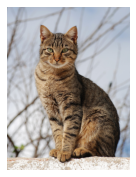

In [ ]:
content_image = "cat.jpg"
print(content_image)
content = plt.imread(content_image)
fig, ax = plt.subplots(figsize=(5, 3))
plt.axis('off')
ax.imshow(content)
plt.show()

style.jpg


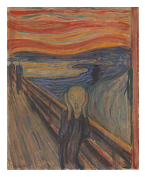

In [ ]:
style_image = "style.jpg"
print(style_image)
style = plt.imread(style_image)
fig, ax = plt.subplots(figsize=(5, 3))
plt.axis('off')
ax.imshow(style)
plt.show()

# Import our model
---

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
def load_image(path_to_img):
  max_dim = 1024
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
def show_image(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

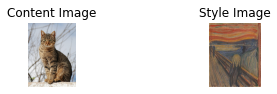

In [ ]:
content_image = "cat.jpg"
style_image = "style.jpg"
content_image = load_image(content_image)
style_image = load_image(style_image)

plt.subplot(3, 2, 1)
plt.axis('off')
show_image(content_image, 'Content Image')

plt.subplot(3, 2, 2)
plt.axis('off')
show_image(style_image, 'Style Image')

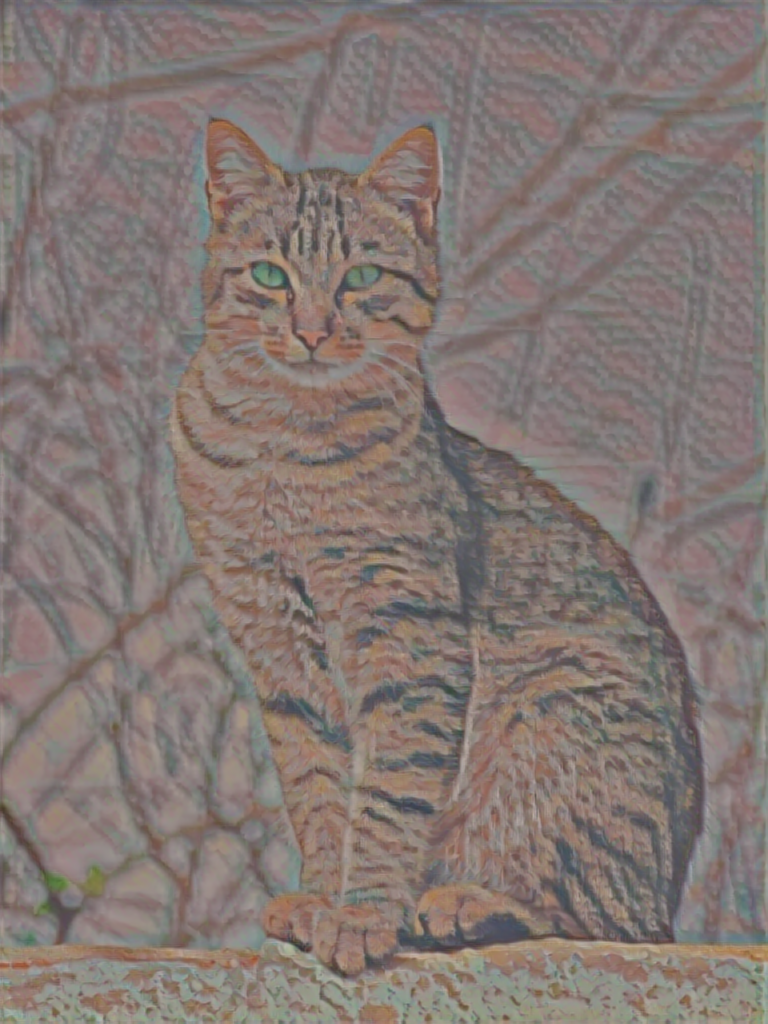

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
image = tensor_to_image(stylized_image)
# img = image.resize((300,400))
image

# Save our new image
---

In [ ]:
file_name = 'stylized-image.png'
image.save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>